### Titanic Survival Prediction Project
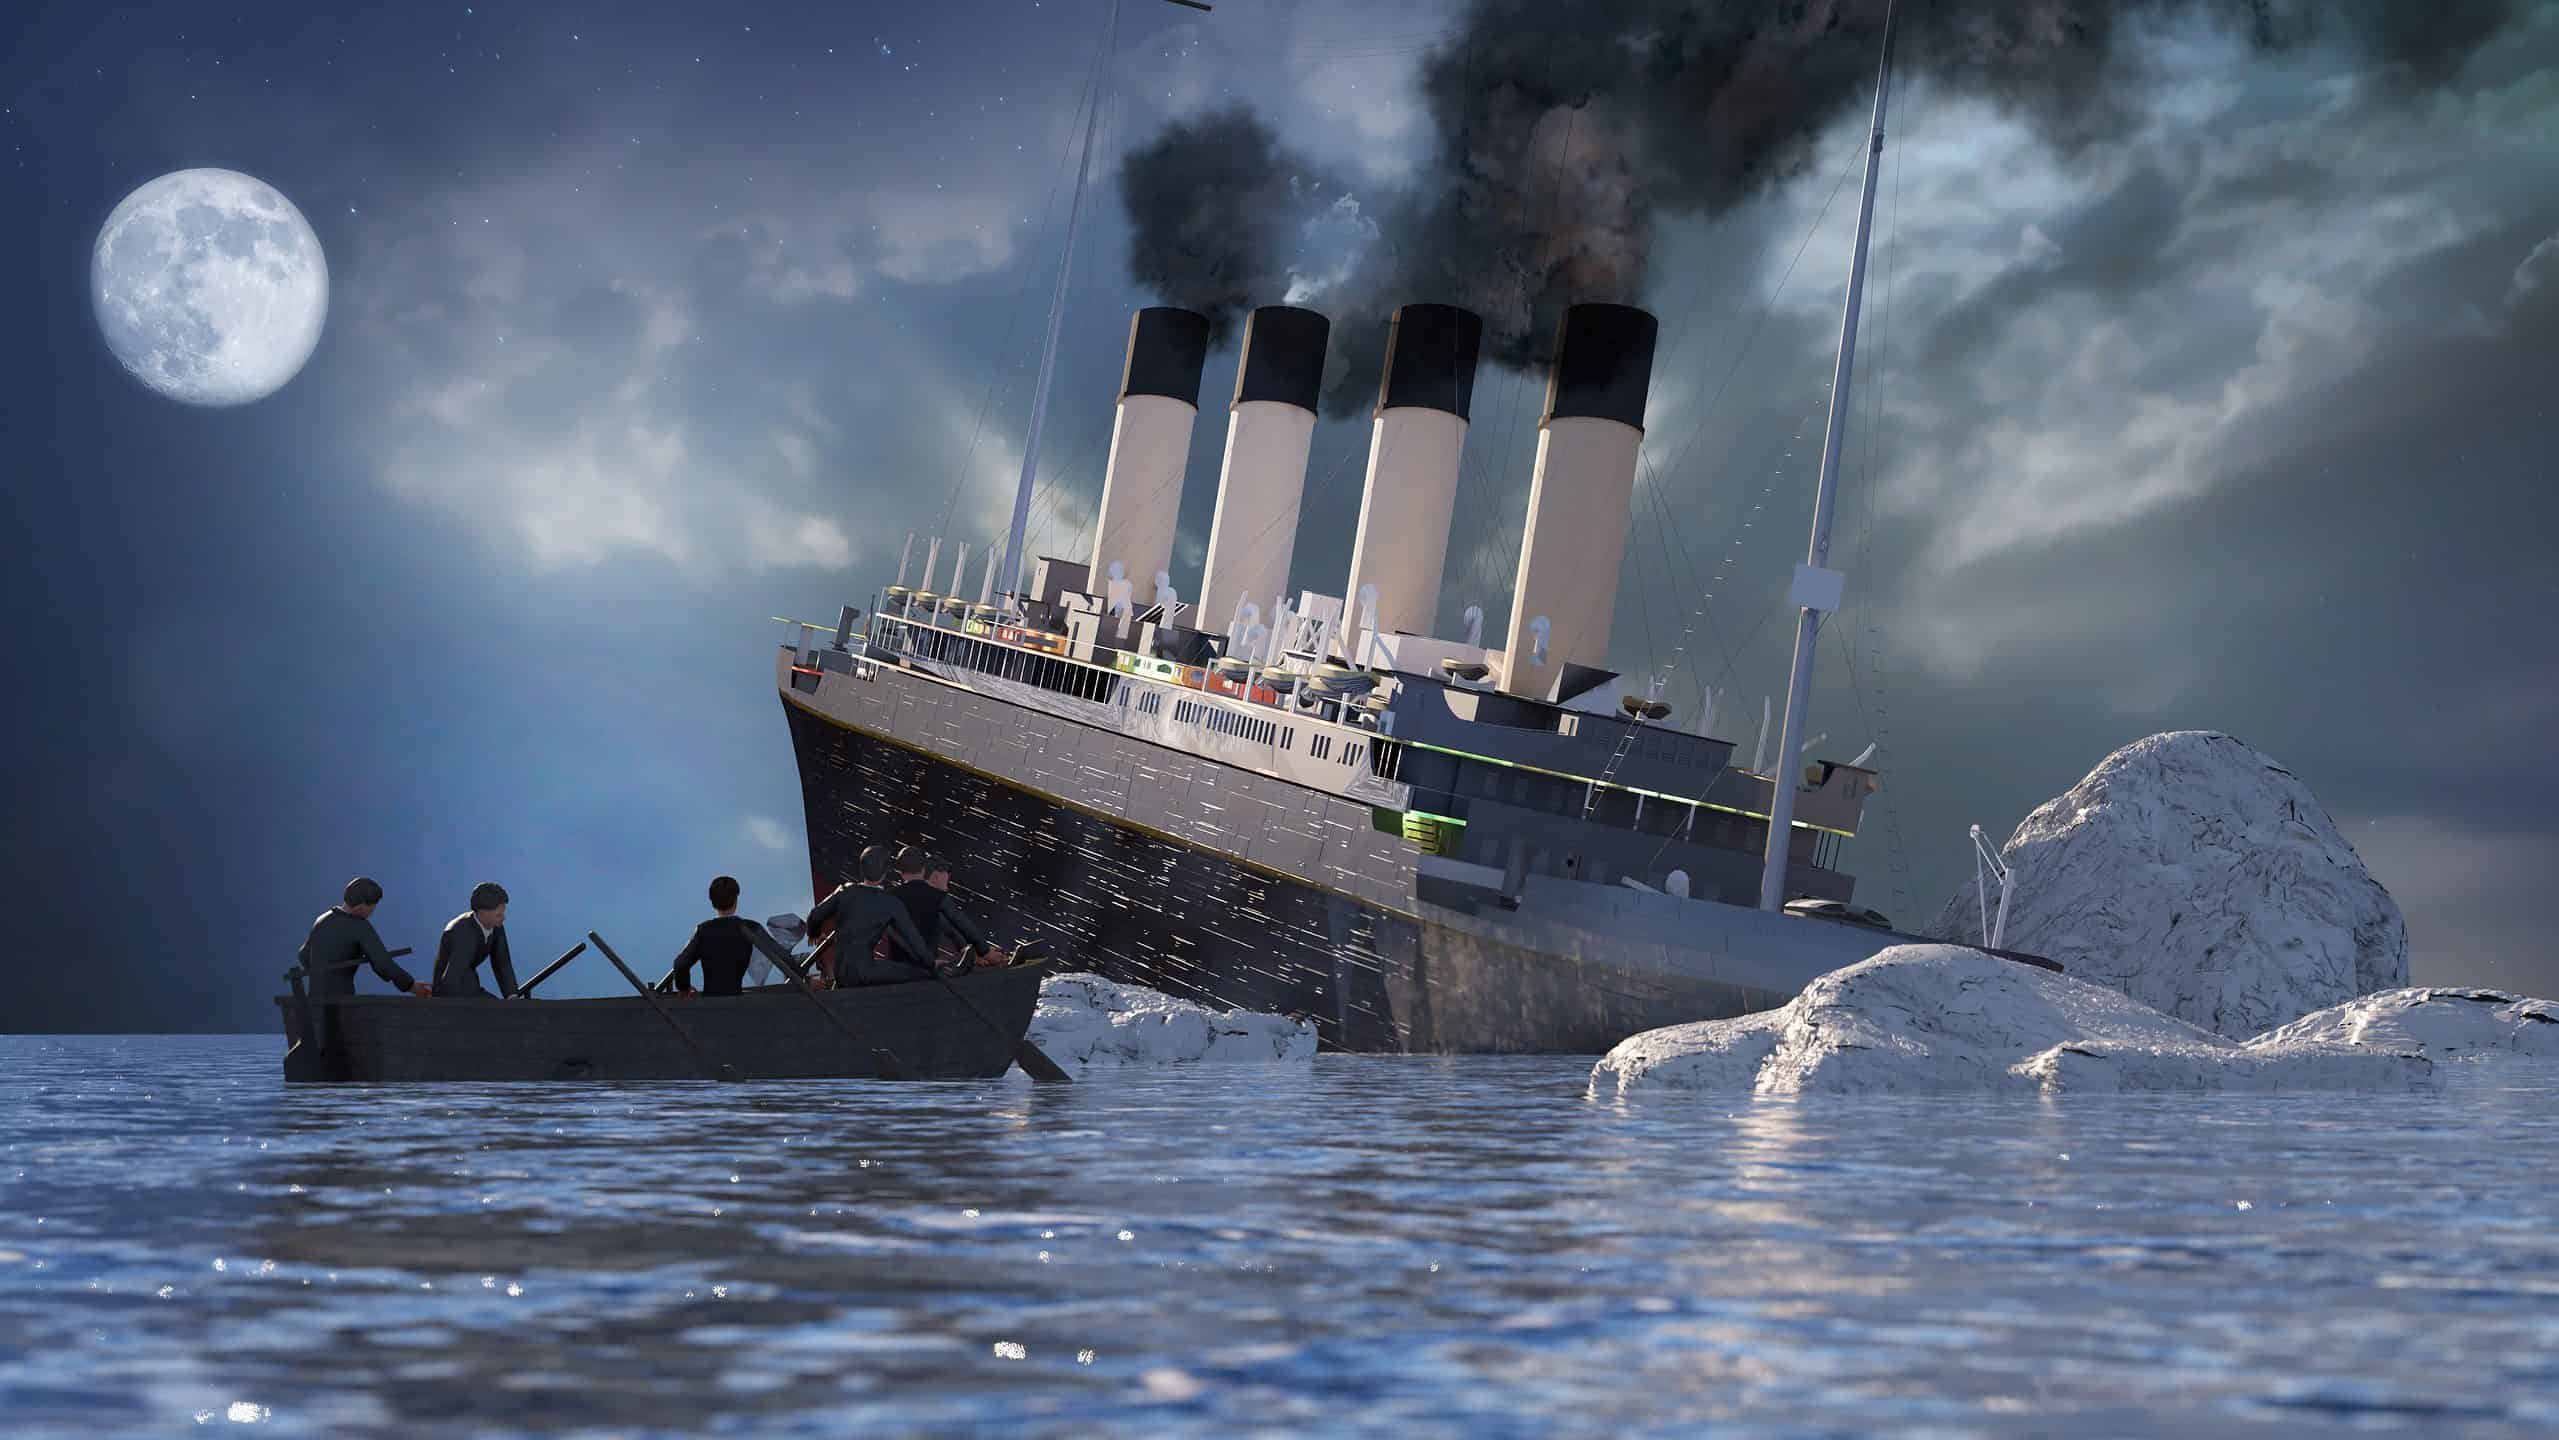
**Dataset Provided:** Titanic Dataset

In this assignment, we are given the Titanic dataset to build predictive models for determining whether a passenger survived the sinking of the Titanic. The dataset originates from Kaggle's Titanic competition (https://www.kaggle.com/c/titanic/data), and it has been widely used in data science for binary classification tasks.

#### Dataset Characteristics

The dataset includes several features that provide insights into the survival chances of passengers, such as:

- **Survival:**  
  - **Type:** Binary (0 = Did not survive, 1 = Survived)  
  - **Description:** Indicates whether a passenger survived the disaster.

- **Pclass (Passenger Class):**  
  - **Type:** Categorical (1, 2, 3)  
  - **Description:** Represents the socio-economic status of the passenger. Higher classes (e.g., 1st class) generally had better access to lifeboats and higher survival rates.

- **Sex:**  
  - **Type:** Categorical (male, female)  
  - **Description:** Gender of the passenger. Historical evacuation procedures favored women and children, impacting survival outcomes.

- **Age:**  
  - **Type:** Numeric  
  - **Description:** Age of the passenger. Survival probabilities often varied across different age groups, with children frequently given priority.

- **SibSp (Number of Siblings/Spouses Aboard):**  
  - **Type:** Numeric  
  - **Description:** The number of siblings or spouses a passenger had on board. Family groups might have influenced decisions during the emergency.

- **Parch (Number of Parents/Children Aboard):**  
  - **Type:** Numeric  
  - **Description:** The number of parents or children aboard, providing further insights into family dynamics.

- **Fare:**  
  - **Type:** Numeric  
  - **Description:** The fare paid by the passenger. This may reflect a more nuanced aspect of socio-economic status beyond the passenger class.

- **Embarked:**  
  - **Type:** Categorical (C = Cherbourg, Q = Queenstown, S = Southampton)  
  - **Description:** The port where the passenger embarked. This variable can indicate regional demographics and socio-economic factors.

#### Project Objectives and Steps

1. **Data Preprocessing and Exploratory Data Analysis (EDA):**  
   - Load the dataset into a Pandas DataFrame.
   - Handle missing values and perform necessary data cleaning.
   - Convert categorical variables into numerical formats suitable for machine learning.
   - Conduct EDA to explore relationships between features and the target variable, uncovering underlying patterns.

2. **Model Building:**  
   - **Data Splitting:** Divide the dataset into training and testing sets.
   - **Logistic Regression:** Build and train a logistic regression model to predict survival.
   - **Decision Tree:** Build and train a decision tree classifier for the same purpose.

3. **Evaluation and Model Comparison:**  
   - Predict survival outcomes on the test set using both models.
   - Evaluate model performance using metrics such as accuracy, precision, recall, and F1 score.
   - Place special emphasis on comparing the models using Receiver Operating Characteristic (ROC) curves.
   - Experiment with different hyperparameters and feature selection methods to enhance model performance.

#### Libraries and Tools

- **Pandas & NumPy:** For data manipulation and numerical operations.
- **Matplotlib & Seaborn:** For creating visualizations to support EDA and model evaluation.
- **Scikit-learn:** For implementing logistic regression, decision tree models, and for performance evaluation.

This notebook will walk you through each step of the process—from data exploration to model training and evaluation—providing a comprehensive approach to understanding the factors influencing survival on the Titanic.


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots appear in the notebook
%matplotlib inline

# Load the Titanic training and test datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Display the first few rows of the training dataset to verify successful loading
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Cleaning

In this section, we address missing values and unnecessary features in both the training and test datasets to ensure our data is complete and reliable for further analysis.

- **Filling Missing Values for Age:**  
  We replace missing values in the `Age` column with the median age. This approach preserves the overall distribution of ages within the dataset.

- **Handling Missing 'Embarked' Values:**  
  For the `Embarked` column, any missing values are filled with the mode (i.e., the most frequently occurring port of embarkation), ensuring consistency in our categorical data.

- **Dropping the 'Cabin' Column:**  
  The `Cabin` column contains a significant amount of missing data. Extracting useful insights from this column is challenging, so we remove it from both datasets.

- **Filling Missing 'Fare' Values in the Test Dataset:**  
  In the test dataset, missing values in the `Fare` column are replaced with the median fare, aligning it with our strategy for handling numerical data.

To avoid chained assignment warnings and ensure that our modifications are applied directly to the original DataFrames, we use the `.loc` accessor when filling missing values.

### Dataset Shape Before and After Cleaning

- **Before Cleaning:**  
  The training dataset originally had a shape of **(891, 12)**, including all 12 columns (with the `Cabin` column).

- **After Cleaning:**  
  After addressing missing values and dropping the `Cabin` column, the dataset now has a shape of **(891, 11)**.

This cleaning process ensures that our datasets are properly preprocessed and ready for the subsequent exploratory data analysis and model-building stages.


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Check for missing values in each column
missing_values = train_df.isnull().sum()
print("train_df", missing_values)

train_df PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
train_df.shape

(891, 12)

In [ ]:
train_df.loc[:, 'Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df.loc[:, 'Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
test_df.loc[:, 'Age'] = test_df['Age'].fillna(test_df['Age'].median())
test_df.loc[:, 'Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())

# Drop the 'Cabin' column from both the training and test datasets, as it contains too many missing values
train_df = train_df.drop(columns=['Cabin'])
test_df = test_df.drop(columns=['Cabin'])



In [ ]:
print("\nAfter cleaning, missing values in Test Dataset:")
print(test_df.isnull().sum())


After cleaning, missing values in Test Dataset:
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [ ]:
train_df.shape

(891, 11)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


# Exploratory Data Analysis
### Summary of EDA Outputs for the Titanic Dataset

#### **1. Univariate Analysis**
- **Age Distribution**: The histogram reveals a right-skewed distribution, which highlights the presence of a relatively young passenger demographic. This is crucial, as younger individuals, especially children, were given priority during evacuations.
- **Fare Distribution**: The histogram for fare shows a heavily right-skewed distribution, suggesting that most passengers paid lower fares, with a few outliers paying significantly higher prices. This reflects the economic diversity among the passengers.
- **Passenger Class Distribution**: The bar chart shows the number of passengers in each class, highlighting that a large number of passengers were in the third class, which correlates with the fare distribution insights.
- **Gender Distribution**: This count plot indicates a higher number of male passengers compared to female passengers on board.
- **Embarkation Points**: The count of passengers by embarkation points shows how many passengers boarded the Titanic from each port, giving insights into the geographical diversity of the passengers.

#### **2. Bivariate Analysis**
- **Survival by Passenger Class**: This count plot shows higher survival rates among higher classes, indicating socio-economic factors played a significant role in survival chances.
- **Survival by Gender**: The count plot reveals significantly higher survival rates for females compared to males, aligning with the historical accounts of "women and children first."
- **Age vs. Survival**: The boxplot for age divided by survival status shows that younger passengers had a slightly better chance of survival, which supports the priority given to children.
- **Fare vs. Survival**: The boxplot comparing fare and survival indicates that passengers who paid higher fares had better survival rates, likely due to their access to resources and perhaps being located in more accessible areas of the ship for evacuation.

#### **3. Multivariate Analysis**
- **Correlation Matrix**: This heatmap of correlations between numerical features shows how each variable relates to the others, with particular emphasis on their relationship to survival. For instance, fare and class show a significant negative correlation, reflecting that higher classes (numerically lower) paid more.
- **Scatter Matrix**: This provides a comprehensive visualization of all numerical features, highlighting relationships and distributions across multiple dimensions with survival as a categorical hue.

- **Gender Impact on Survival**: Analysis shows a significant survival disparity with females surviving at a rate of 74.20% versus 18.89% for males, reflecting the historical "women and children first" evacuation protocol.
- **Class Influence**: Survival rates decrease with lower socio-economic status, with first-class passengers having a 62.96% survival rate compared to 24.24% for third-class passengers.
- **Age Factor**: Youngest passengers (0-10 years) had the highest survival rate at 61.29%, underscoring the prioritization of children during lifeboat loading.
- **Fare Correlation**: Passengers who paid higher fares showed higher survival rates, with the highest fare group achieving a 73.58% survival rate, indicating better access to life-saving resources.



**Univarite Analysis**

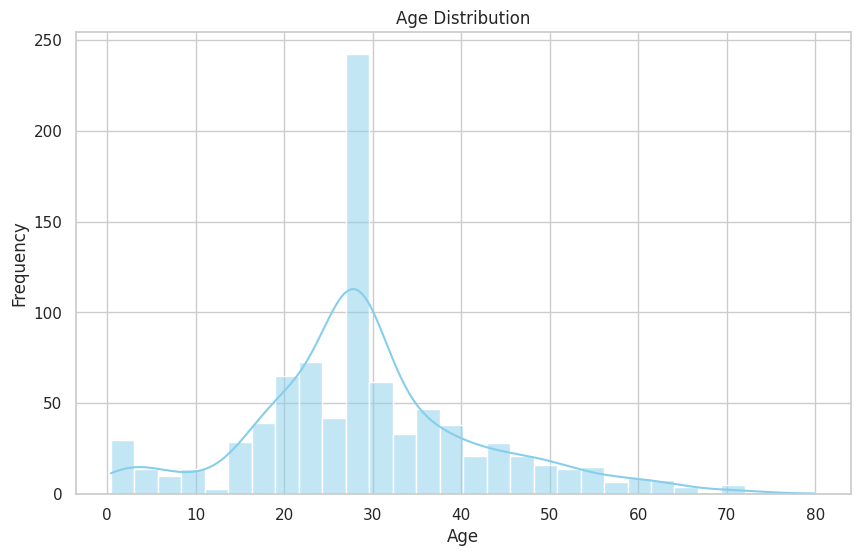

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# 1. Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Age'], kde=True, bins=30, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


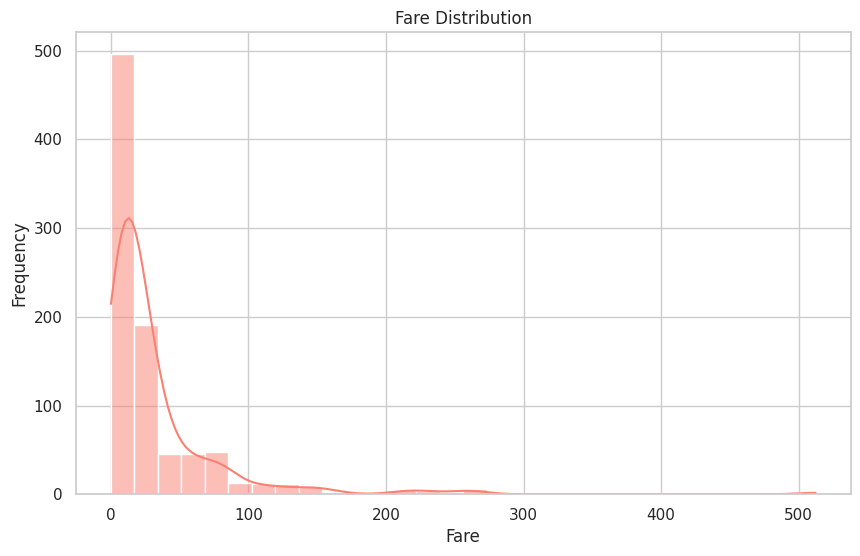

In [ ]:
# 2. Distribution of Fare
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Fare'], kde=True, bins=30, color='salmon')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

<ipython-input-64-cfbf0eec3f05>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




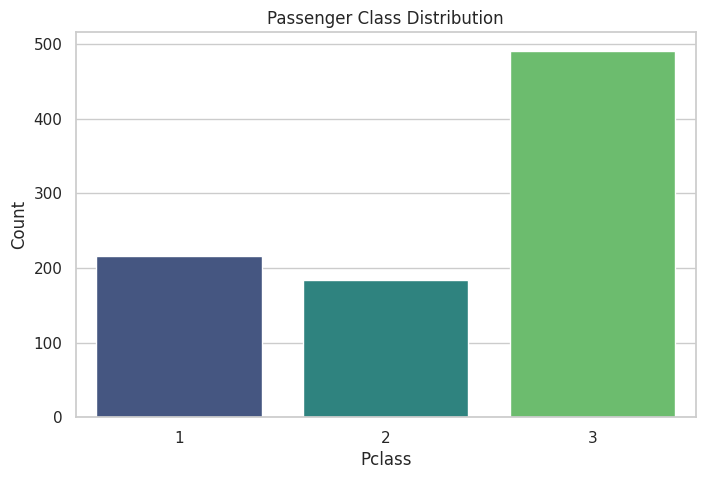

In [ ]:
# 3. Count of Passenger Classes (Pclass)
plt.figure(figsize=(8, 5))
sns.countplot(x='Pclass', data=train_df, palette='viridis')
plt.title('Passenger Class Distribution')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

<ipython-input-65-fa8ee03f2a9e>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




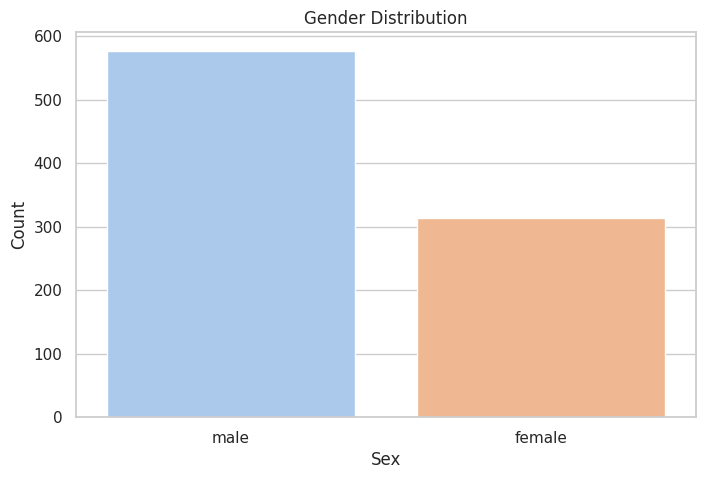

In [ ]:
# 4. Count of Sex
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', data=train_df, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


<ipython-input-66-71205cb94366>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




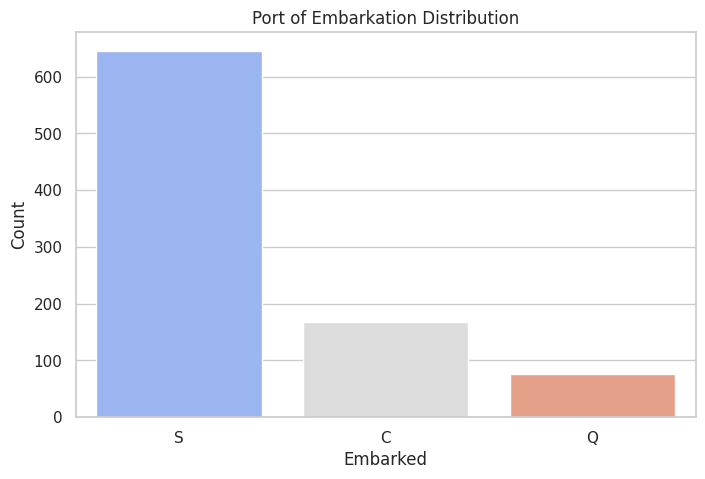

In [ ]:
# 5. Count of Embarked values
plt.figure(figsize=(8, 5))
sns.countplot(x='Embarked', data=train_df, palette='coolwarm')
plt.title('Port of Embarkation Distribution')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd

# Select the columns to plot
data = train_df[['Age', 'Fare', 'SibSp', 'Parch']]

# Convert the DataFrame from wide to long format
data_long = data.melt(var_name='Variable', value_name='Value')

# Create interactive box plots with Plotly Express
fig = px.box(
    data_long,
    x="Variable",
    y="Value",
    color="Variable",
    color_discrete_sequence=px.colors.qualitative.Set1,
    title="Box Plots for Titanic Data"
)

# Update layout for a dark-themed background and enhanced visual appeal
fig.update_layout(
    title_x=0.5,  # Center the title
    paper_bgcolor='rgb(0, 0, 0)',  # Background color of the entire figure
    plot_bgcolor='rgb(23, 23, 23)',  # Plot area background color
    font=dict(color='white'),  # Set text color to white for better visibility
    hoverlabel=dict(
        bgcolor="black",  # Background color of hover labels
        font_size=14,     # Font size of hover labels
        font_color='white'  # Font color of hover labels
    )
)

# Enhance axes titles for better readability
fig.update_xaxes(title_font=dict(size=18, family='Courier', color='white'))
fig.update_yaxes(title_font=dict(size=18, family='Courier', color='white'))

# Display the interactive plot
fig.show()


**Bivariate Analysis**

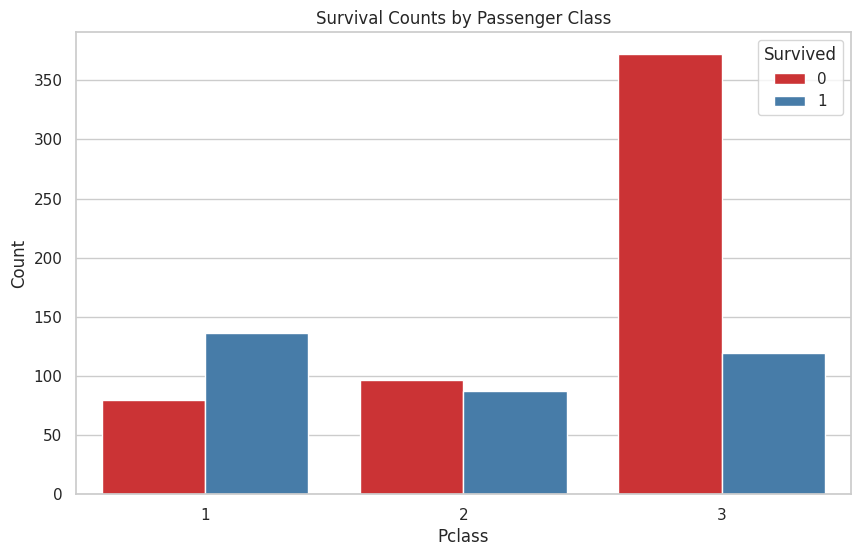

In [ ]:
# 1. Survival count by Passenger Class
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=train_df, palette='Set1')
plt.title('Survival Counts by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

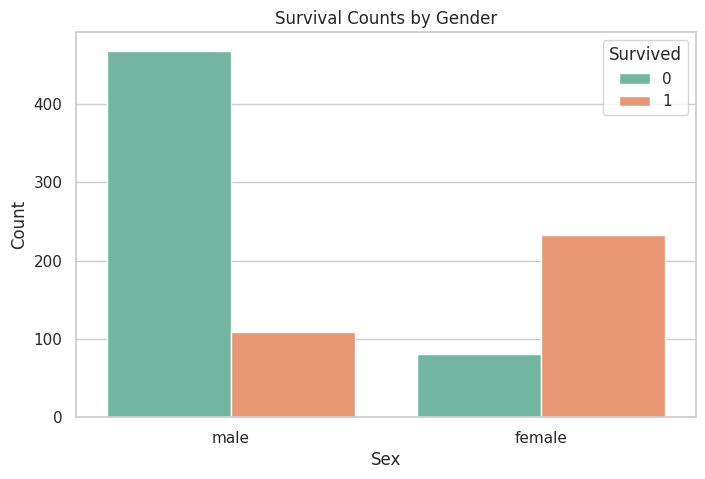

In [ ]:
# 2. Survival count by Sex
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', hue='Survived', data=train_df, palette='Set2')
plt.title('Survival Counts by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()

<ipython-input-70-91ded7de408a>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




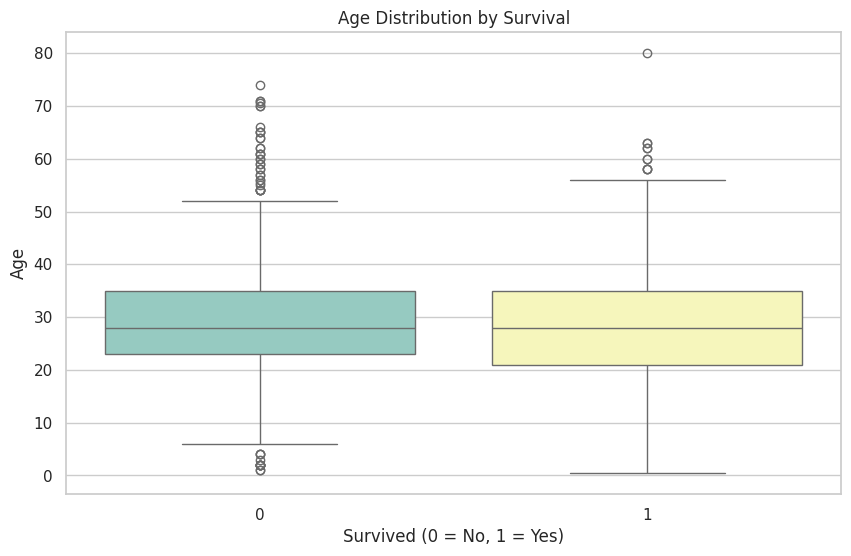

In [ ]:
# 3. Boxplot of Age vs. Survival
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=train_df, palette='Set3')
plt.title('Age Distribution by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

<ipython-input-71-334e5a7b9043>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




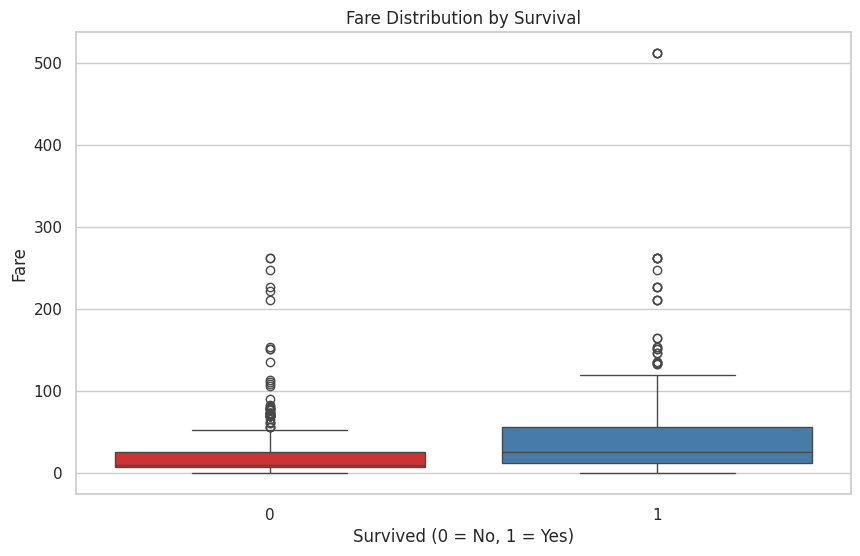

In [ ]:
# 4. Fare vs. Survival
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', data=train_df, palette='Set1')
plt.title('Fare Distribution by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()

**Multivariate Analysis**


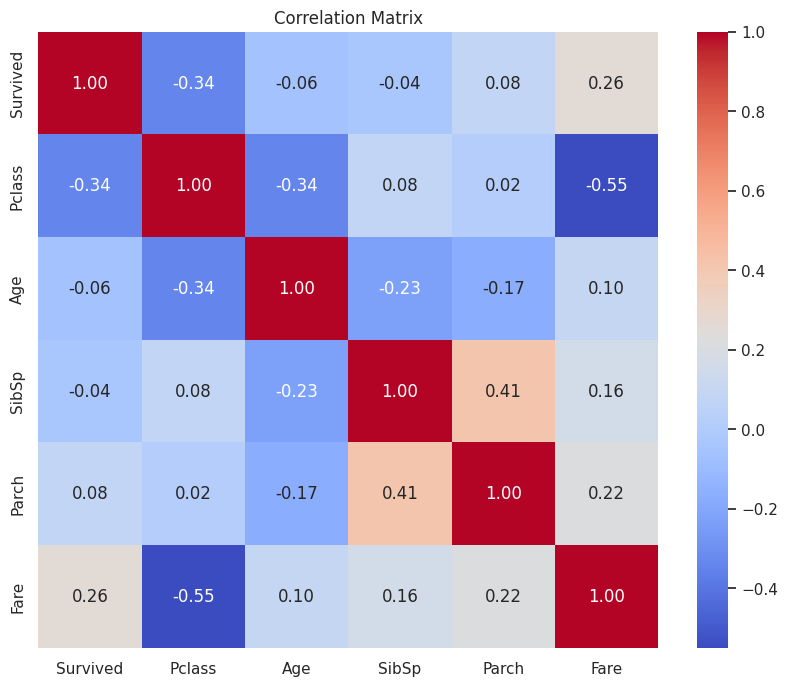

In [ ]:
# 1. Correlation Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = train_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


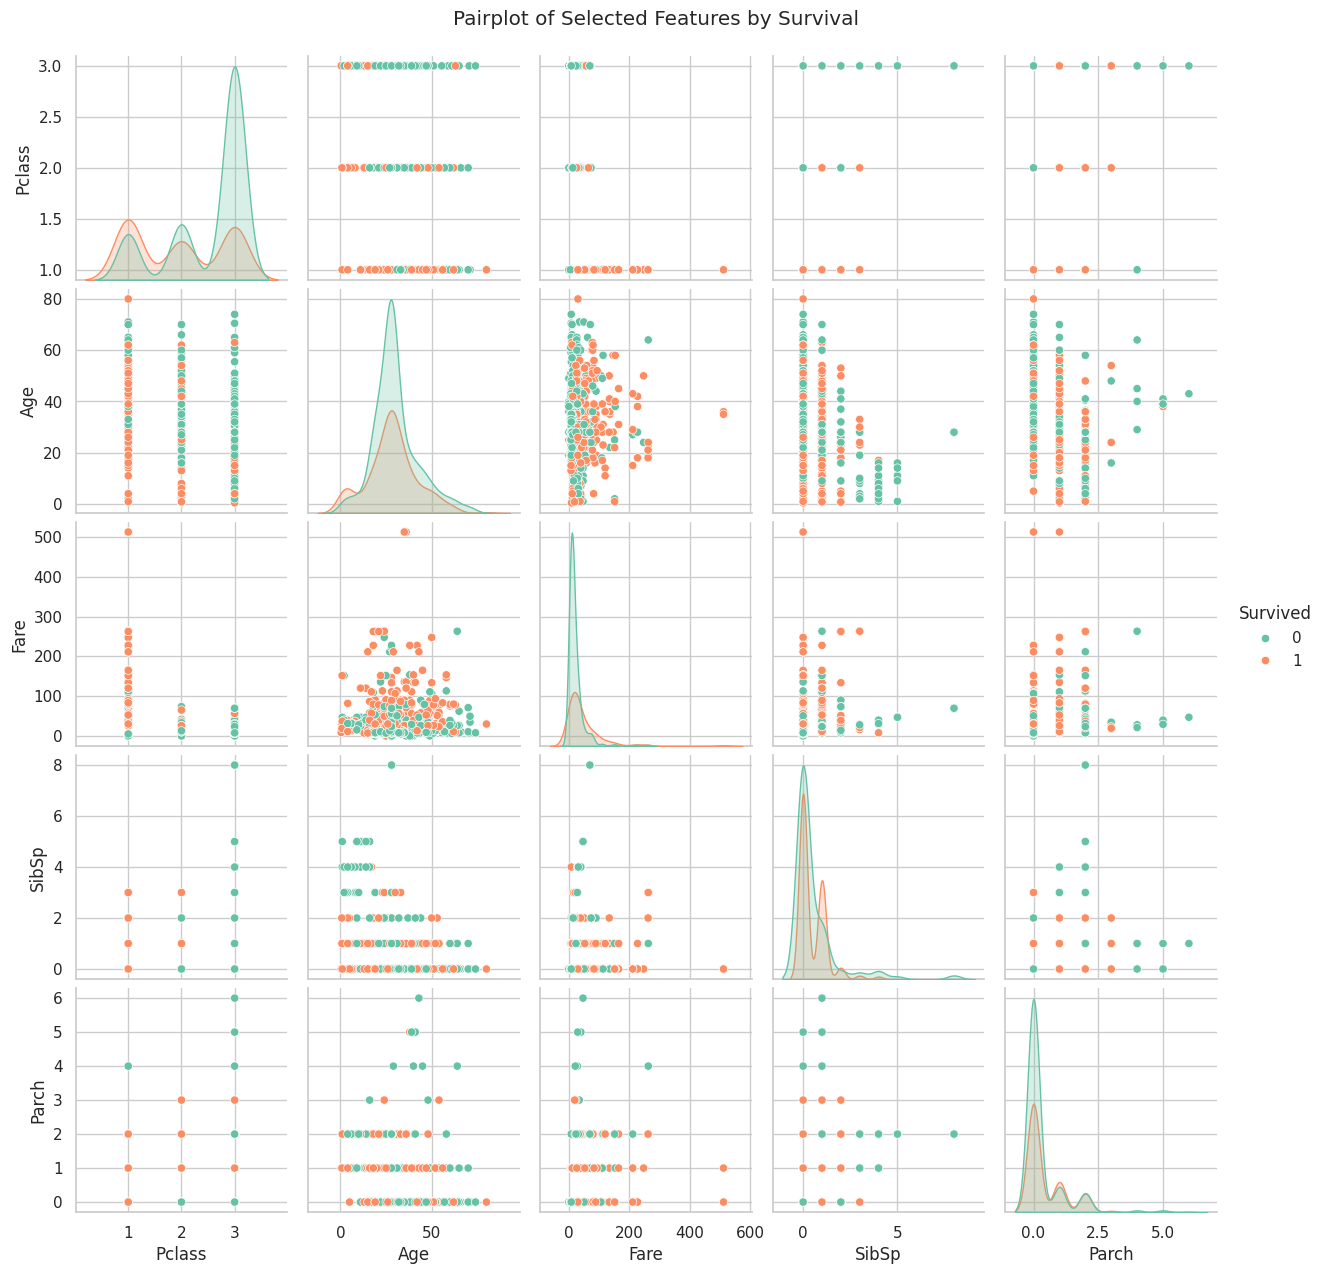

In [ ]:
# 2. Pairplot to visualize relationships between multiple features with survival as hue
sns.pairplot(train_df[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']],
             hue='Survived', palette='Set2', diag_kind='kde')
plt.suptitle('Pairplot of Selected Features by Survival', y=1.02)
plt.show()


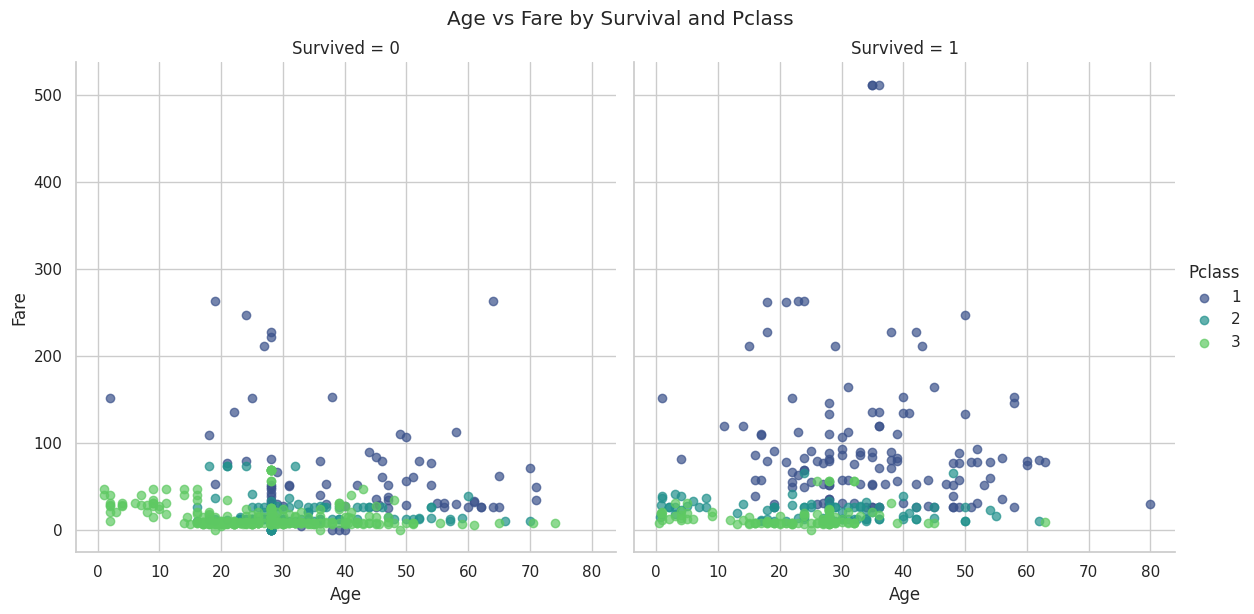

In [ ]:
# 3. Multivariate Visualization: Age vs Fare colored by Pclass and faceted by Survived
g = sns.FacetGrid(train_df, col='Survived', hue='Pclass', palette='viridis', height=6)
g.map(plt.scatter, 'Age', 'Fare', alpha=0.7)
g.add_legend(title='Pclass')
g.fig.suptitle('Age vs Fare by Survival and Pclass', y=1.02)
plt.show()

In [ ]:
# Group by gender and calculate the survival rate (mean of the Survived column)
gender_survival = train_df.groupby('Sex')['Survived'].mean().reset_index()
# Convert the survival rate to percentage
gender_survival['Survival Rate (%)'] = gender_survival['Survived'] * 100

# Create an interactive bar graph using Plotly Express
fig = px.bar(
    gender_survival,
    x='Sex',
    y='Survival Rate (%)',
    text='Survival Rate (%)',
    title="Survival Rate by Gender",
    color='Sex',
    color_discrete_sequence=px.colors.qualitative.Pastel
)

# Format the text on the bars and update layout for better axis titles
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(
    xaxis_title="Gender",
    yaxis_title="Survival Rate (%)",
    title_x=0.5
)

# Show the interactive plot
fig.show()



In [ ]:
import pandas as pd
import plotly.express as px

# Group by Passenger Class and calculate the survival rate (mean of the Survived column)
class_survival = train_df.groupby('Pclass')['Survived'].mean().reset_index()
# Convert the survival rate to percentage
class_survival['Survival Rate (%)'] = class_survival['Survived'] * 100

# Create an interactive bar graph using Plotly Express
fig = px.bar(
    class_survival,
    x='Pclass',
    y='Survival Rate (%)',
    text='Survival Rate (%)',
    title="Survival Rate by Passenger Class",
    color='Pclass',
    color_continuous_scale=px.colors.sequential.Viridis
)

# Format the text on the bars and update layout for better axis titles
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(
    xaxis_title="Passenger Class",
    yaxis_title="Survival Rate (%)",
    title_x=0.5
)

# Show the interactive plot
fig.show()


In [ ]:
# Create age bins for the Titanic dataset
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=bins, labels=labels, right=False)

# Group by AgeGroup and calculate the survival rate
age_survival = train_df.groupby('AgeGroup')['Survived'].mean().reset_index()
age_survival['Survival Rate (%)'] = age_survival['Survived'] * 100

# Create an interactive bar graph using Plotly Express
fig = px.bar(
    age_survival,
    x='AgeGroup',
    y='Survival Rate (%)',
    text='Survival Rate (%)',
    title="Survival Rate by Age Group",
    color='AgeGroup',
    color_discrete_sequence=px.colors.qualitative.Plotly
)

# Format the text on the bars and update layout for better axis titles
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(
    xaxis_title="Age Group",
    yaxis_title="Survival Rate (%)",
    title_x=0.5
)

# Display the interactive plot
fig.show()


<ipython-input-77-1e849a07c148>:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
# Define fare bins and labels.
# Note: The fare distribution is right-skewed, so we choose bins that capture the range well.
bins = [0, 10, 20, 30, 40, 50, 100, 600]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-100', '100-600']

# Create a new column 'FareGroup' by binning the 'Fare' column
train_df['FareGroup'] = pd.cut(train_df['Fare'], bins=bins, labels=labels, right=False)

# Group the data by 'FareGroup' and calculate the mean survival rate
fare_survival = train_df.groupby('FareGroup')['Survived'].mean().reset_index()
fare_survival['Survival Rate (%)'] = fare_survival['Survived'] * 100

# Create an interactive bar graph using Plotly Express
fig = px.bar(
    fare_survival,
    x='FareGroup',
    y='Survival Rate (%)',
    text='Survival Rate (%)',
    title="Survival Rate by Fare Group",
    color='FareGroup',
    color_discrete_sequence=px.colors.qualitative.Plotly
)

# Format the text on the bars and update layout for better axis titles
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(
    xaxis_title="Fare Group",
    yaxis_title="Survival Rate (%)",
    title_x=0.5
)

# Display the interactive plot
fig.show()


<ipython-input-78-8b5ecc57a70d>:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



# Logistic Regression

### Spliting the data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, f1_score, roc_curve, auc
from sklearn.metrics import precision_score

train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)

# Select features (including encoded ones)
X = train_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
y = train_df['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Creating the Model

In [ ]:
# Create a logistic regression model with increased max_iter
logreg = LogisticRegression(max_iter=1000)

# Train the model on the training data
logreg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = logreg.predict(X_test)

### Accuracy

In [ ]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8324022346368715


###Precision

In [ ]:
# Calculate precision for the logistic regression model
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

Precision: 0.7969


### Recall

In [ ]:
# Calculate recall for the logistic regression model
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

Recall: 0.7500


###F1 Score

In [ ]:
# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='macro')  # Use 'macro' for multi-class classification
print("F1 Score:", f1)

F1 Score: 0.8199919549477072


### ROC Curve

AUC: 0.8895733969263382


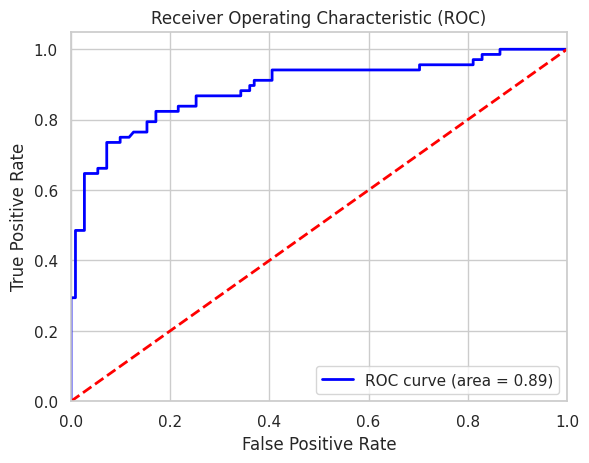

In [ ]:
# Make predictions on the testing data
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# Compute the ROC curve and area under the curve (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Print AUC score
print(f"AUC: {roc_auc}")

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
#plt.plot(fpr2, tpr2, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Based on the results from the metrics for this model, it can be said that in terms of performance it is decent. Altough there is room for improvement, the logistic regression model is in fact capable of representing and understanding the relationships in the data to create usefull predictions.

### Scaled model

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model with increased max_iter
logreg_scaled = LogisticRegression(max_iter=1000)

# Train the model on the training data
logreg_scaled.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred_scaled = logreg_scaled.predict(X_test_scaled)


accuracy_scaled = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision_scaled = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

f1 = f1_score(y_test, y_pred, average='macro')  # Use 'macro' for multi-class classification
print("F1 Score:", f1)

Accuracy: 0.8324022346368715
Precision: 0.7969
Recall: 0.7500
F1 Score: 0.8199919549477072


Here, we scaled the data in order to see if it could improve the model. However the accuracy results were the same, the reason as to why this is has to do with the nature of the data. Standardizing the data helps improve models when there are large numeric differences present in the data, in this dataset the numeric differences are not large enough to make a difference once standardized.

# Decision Tree

## Creating the Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create and fit the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]

## Accuracy

In [ ]:
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")

Decision Tree Accuracy: 0.8436


## Precision

In [ ]:
dt_precision = precision_score(y_test, y_pred_dt)
print(f"Decision Tree Precision: {dt_precision:.4f}")

Decision Tree Precision: 0.8333


## Recall

In [ ]:
dt_recall = recall_score(y_test, y_pred_dt)
print(f"Decision Tree Recall: {dt_recall:.4f}")

Decision Tree Recall: 0.7353


##F1 Score

In [ ]:
dt_f1 = f1_score(y_test, y_pred_dt)
print(f"Decision Tree F1 Score: {dt_f1:.4f}")

Decision Tree F1 Score: 0.7812


## ROC Curve

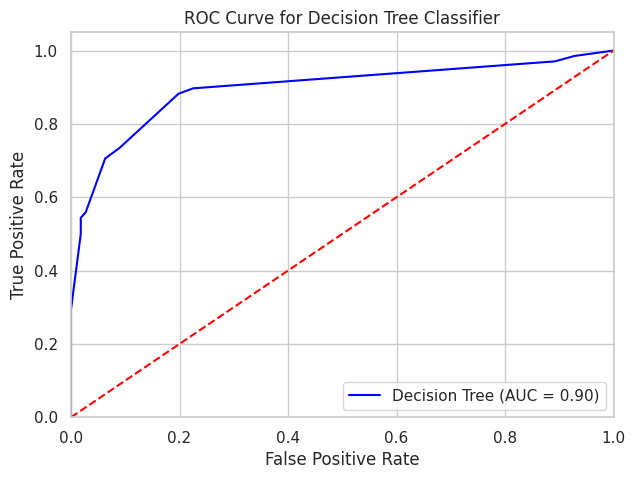

In [ ]:
# Plot ROC curve for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(7, 5))
plt.plot(fpr_dt, tpr_dt, color='blue', label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Based on the ovarall results, the model is decent in terms of performace. Although it has room for improvement, it can be said that is is usefull.

# Improving the models

## Feature Engeneering

### Creating the new features


In order ot improve the models, we first decided to do some feature engeneering. We decided to create two new features using the data from to already existing columns we believed to have predictive potential once combined.

In [ ]:
# Create new features
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
train_df['IsAlone'] = (train_df['FamilySize'] == 1).astype(int)

### Extracting titles

In [ ]:
# Extract titles from names
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train_df['Title'] = train_df['Title'].replace(['Mlle','Ms'],'Miss')
train_df['Title'] = train_df['Title'].replace(['Mme','Lady','Countess'],'Mrs')
train_df['Title'] = train_df['Title'].replace(['Capt','Col','Major','Dr','Rev','Sir','Jonkheer','Don'],'Other')

# One-hot encode new categorical features
train_df = pd.get_dummies(train_df, columns=['Title'], drop_first=True)

### Adding features to the model

In [ ]:
# Include new features in X
X = train_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
              'Embarked_Q', 'Embarked_S', 'FamilySize', 'IsAlone'] +
             [col for col in train_df.columns if 'Title_' in col]]

y = train_df['Survived']

## Hyperparameter

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Hyperparameter grid for the Logistic Regression model
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'max_iter': [200, 500]
}

grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy', verbose=1)
grid_lr.fit(X_train, y_train)

print(f"Best Parameters for Logistic Regression: {grid_lr.best_params_}")
print(f"Best Score: {grid_lr.best_score_}")

best_lr = grid_lr.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters for Logistic Regression: {'C': 1, 'max_iter': 200, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.7935684034275584


In [ ]:
# Hyperparameter grid for the Logistic Regression model
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=10, scoring='accuracy', verbose=1)
grid_dt.fit(X_train, y_train)

print(f"Best Parameters for Decission Trees: {grid_dt.best_params_}")
print(f"Best Score: {grid_dt.best_score_}")

best_dt = grid_dt.best_estimator_

Fitting 10 folds for each of 90 candidates, totalling 900 fits
Best Parameters for Decission Trees: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Score: 0.8118935837245695


After testing a variety of parameters, there was a slight improvement when compared to the previous result, form approximately 79% to now approximately 80%

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight='balanced',
    random_state=42
)
rf_model.fit(X_train_selected, y_train)

y_proba_rf = rf_model.predict_proba(X_test_selected)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

print(f"Random Forest AUC: {roc_auc_rf:.2f}")

Random Forest AUC: 0.91


with the Random Forest Classifier the goal was to use different trees to find the best possible outcome, however the result was of 87% which indicates that perhaps a single tree performs better for this type of data, like one previously done earlier in the exploration.

## Feature Selection

With feature selection, we have made it so that the least important, or relevant, features are removed from the model. Their  importance in this test is based on the logistic regression coefficients.

In [ ]:
from sklearn.feature_selection import RFE

# Feature selection with Logistic Regression
rfe = RFE(estimator=LogisticRegression(max_iter=500), n_features_to_select=8)
rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_]
print(f"Selected Features: {selected_features}")

Selected Features: Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')


### Re-Training the model

In [ ]:
# Re-train model with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

best_lr.fit(X_train_selected, y_train)
print(f"Accuracy with selected features: {best_lr.score(X_test_selected, y_test)}")

Accuracy with selected features: 0.8268156424581006


The method selected the 8 most relevant features, however this did not improve the model, as the accuracy result remained 79%. This leads us to believe that the issue is not the varaibles choosen for the model.

## Comparing the ROC Curves

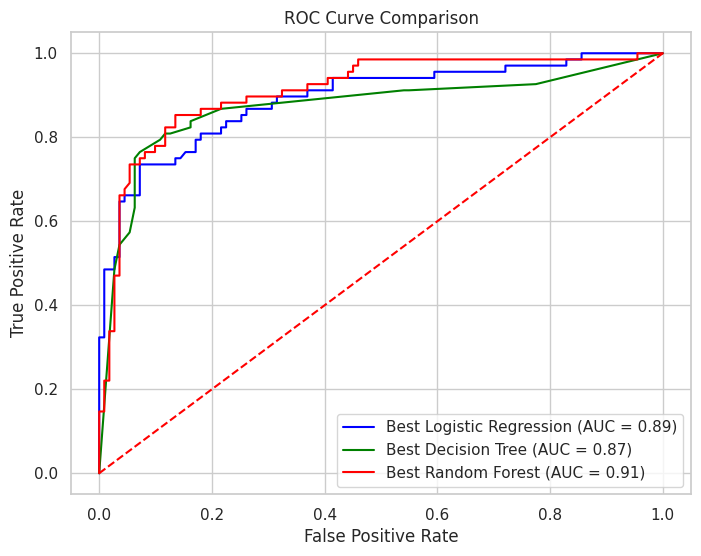

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predictions for ROC curves
y_proba_lr = best_lr.predict_proba(X_test_selected)[:, 1]
y_proba_dt = best_dt.predict_proba(X_test)[:, 1]
y_proba_rf = rf_model.predict_proba(X_test_selected)[:, 1]

# ROC for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# ROC for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

#ROC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plotting both curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'Best Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_dt, tpr_dt, color='green', label=f'Best Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, color='red', label=f'Best Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

As seen from these ROC curves. Both of the models have changed in terms of performance. The logistic regression model improved from 82% to 88%, which is a really good outcome. However, the decision tree result deacreased from 84% to 52%. Although the posibility hunan error when tunning exists, these results could mean tha the data is simply better explained in through a linear relationship.

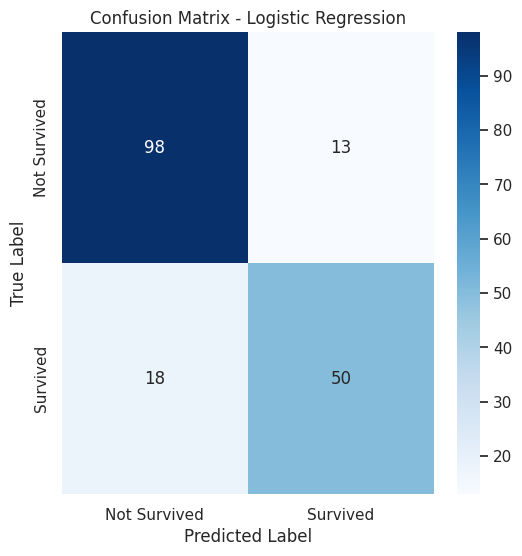

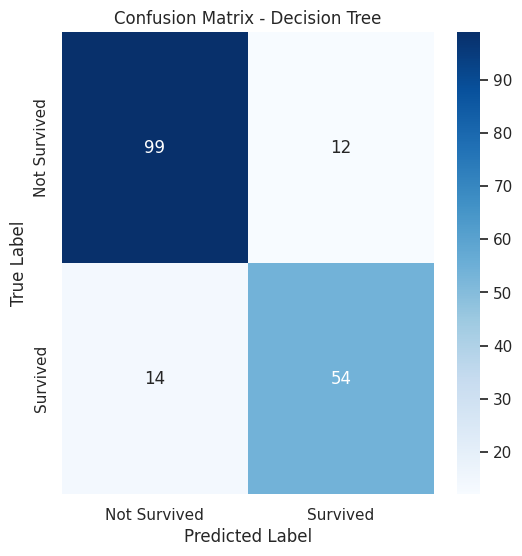

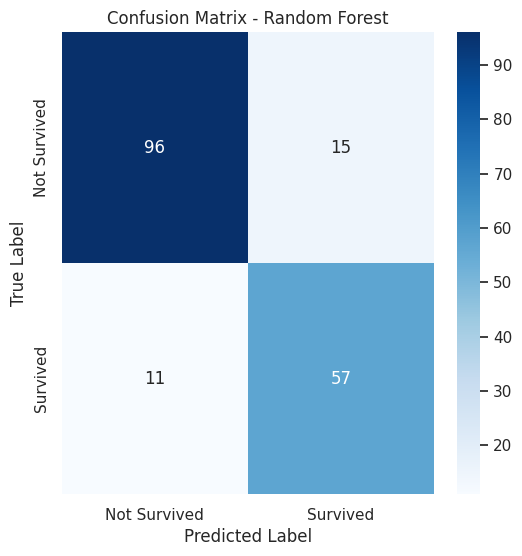

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Not Survived', 'Survived'],
                yticklabels=['Not Survived', 'Survived'])
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

plot_confusion_matrix(y_test, y_pred_lr, "Confusion Matrix - Logistic Regression")
plot_confusion_matrix(y_test, y_pred_dt, "Confusion Matrix - Decision Tree")
plot_confusion_matrix(y_test, y_pred_rf, "Confusion Matrix - Random Forest")